The goal of the project was to examine the discrete fourier transform. Task 1) is completed in the following code:

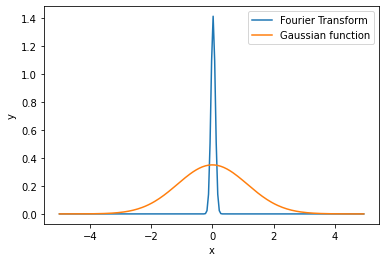

In [204]:
import numpy as np
import matplotlib.pyplot as plt


#gaussian function mu, and sigma chosen arbitrarily
def gaussian(x, mu = 0, sigma = 1.14):
    return (1/(np.sqrt(2 * np.pi) * sigma)) * np.exp(- ((x - mu) ** 2) / (2 * np.power(sigma, 2)))

#function for the second problem
def f(x):
    return np.power(np.sin(x), 2) * np.exp(-(x-(np.pi/2)**2))

#Function to compute the fourier coefficient (index) marks the number of the coefficient
def compute_coefficient(points, index):
    return sum([points[k] * np.exp(-1j * 2 * np.pi * k * index / len(points)) for k in range(len(points))])

#Point generation function
def get_points(start, end, N = 200):
    delta_t = (end - start) / (N - 1)
    
    return np.arange(start, end, step=delta_t)
    
#function that actually computes discrete Fourier transform
def DFT(function_point_set):
    return np.array([compute_coefficient(function_point_set, i) for i in range(len(function_point_set))])

#Used to perform shift after Fourier transform, because the frequency needs to be cenetered at 0
#The idea behind is to reflect the dataset according to the main axis. Example: 12345 => 45312
def perform_shift(dataset):
    split_index = int(len(dataset) / 2)
    datalist = dataset.tolist()
    
    return np.array(datalist[split_index:] + datalist[:split_index])


x = get_points(-5, 5)
data = gaussian(x)
transform = perform_shift(np.abs(DFT(data))) / np.sqrt(len(data))

plt.plot(x, transform)
plt.plot(x, data)

plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Fourier Transform', 'Gaussian function'])


The Fourier transform for Gaussian function gave the expected results and yielded the gaussian shaped function. The peak of the input and output function corresponds, but the Fourier transformed function has a much bigger peak and lower width.

Text(0.5, 1.0, 'Error')

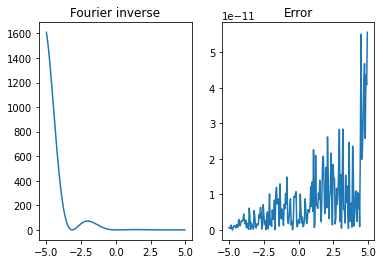

In [203]:
x = get_points(-5, 5)
dft_results = DFT(f(x))

def DFT_inverse(data):
    results = []
    for i in range(len(data)):
        result = sum([data[m] * np.exp(1j * 2 * np.pi * m * i / len(data)) for m in range(len(data))])
        results.append(result)
    
    return np.array(results)
    

inverse = abs(DFT_inverse(dft_results / len(dft_results)))
differences = np.abs(inverse - f(x))

plt.subplot(1, 2, 1)
plt.plot(x, inverse)
plt.title('Fourier inverse')

plt.subplot(1, 2, 2)
plt.plot(x, differences)
plt.title('Error')



The inverse of the Fourier transform yielded a very similar function. The fact confirmed the theory, because
inverse of the fourier transform should give a function that was transformed. The error between inverse transformed function and original function was in the order of magnitude of 10^-11, which was a result of limited precision of number representation in computers (especially when exponentiating).